# Benchmark Data Treatment Of The IP (RR) And ILP (RR Improved)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
rr_df = pd.read_csv('./data/fabio_rr_results.csv')

rr_imp_df = pd.read_csv('./data/fabio_rr_imp_results.csv')
rr_and_imp_df = rr_df.merge(rr_imp_df, how = 'inner', on =['plot_name', 'graph_type', 'size', 'probabilities'], suffixes = ('_rr', '_imp'))

## Plotting

In [33]:
plot_names = rr_and_imp_df['plot_name'].unique()

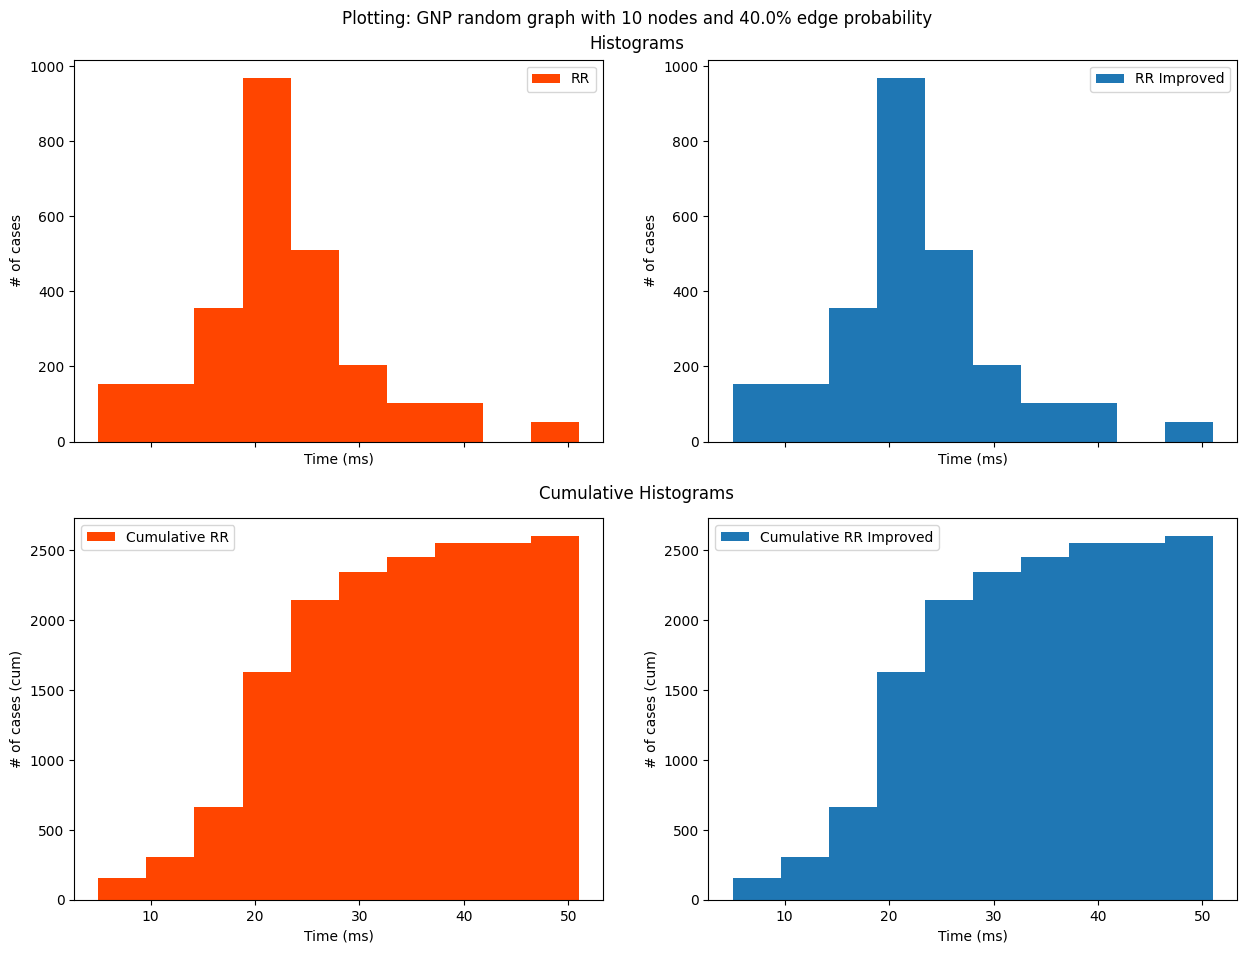

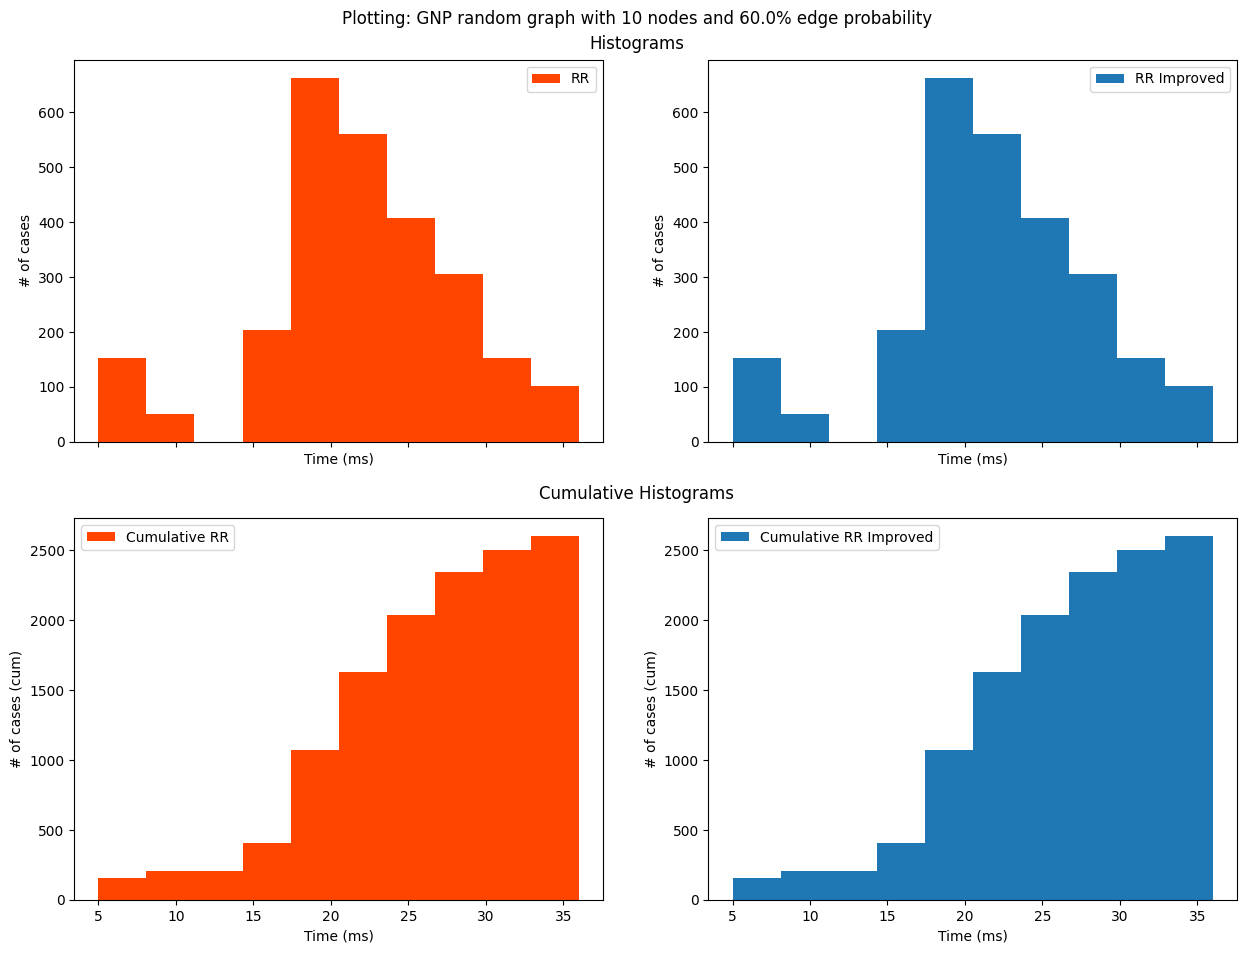

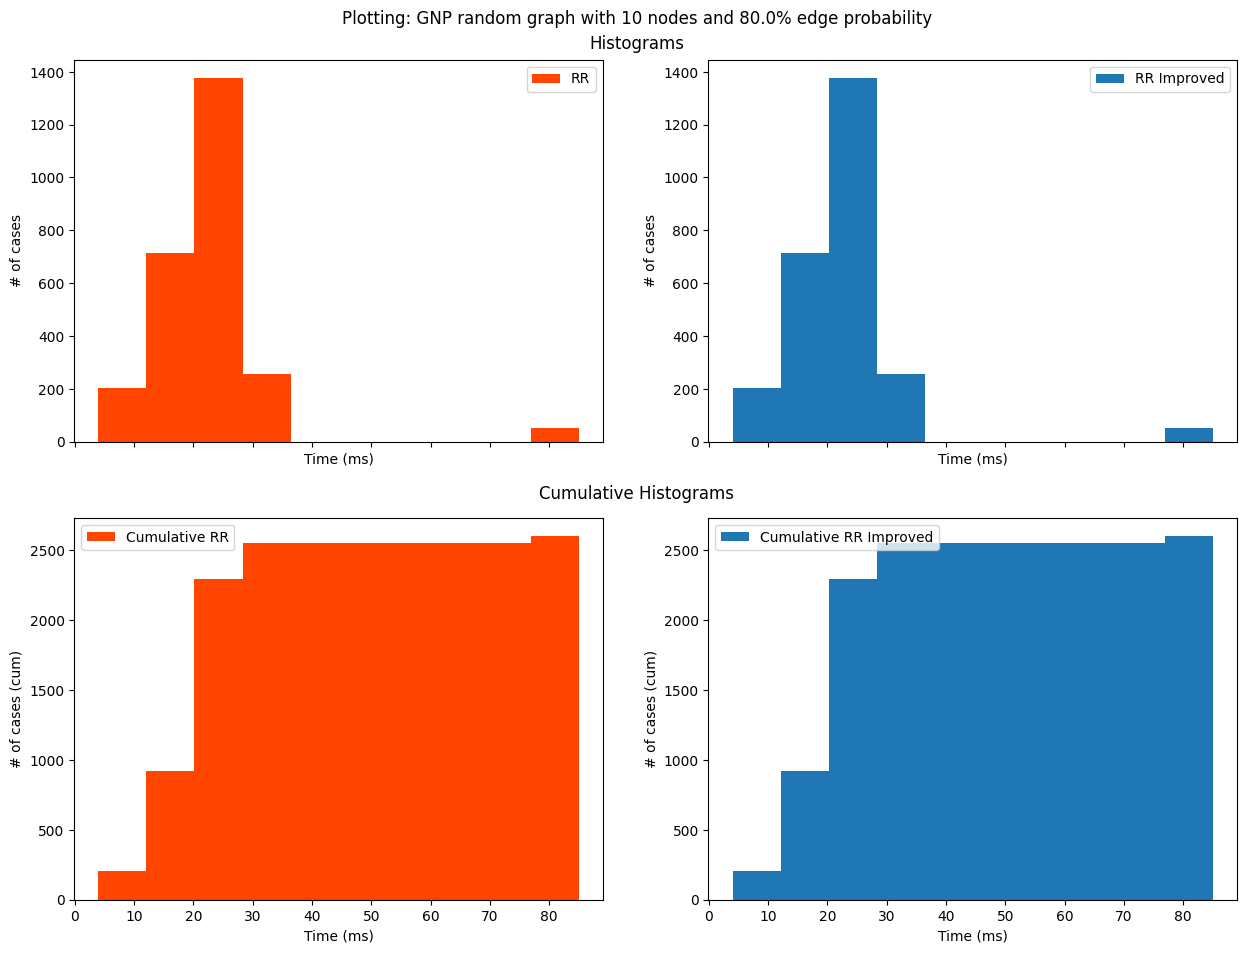

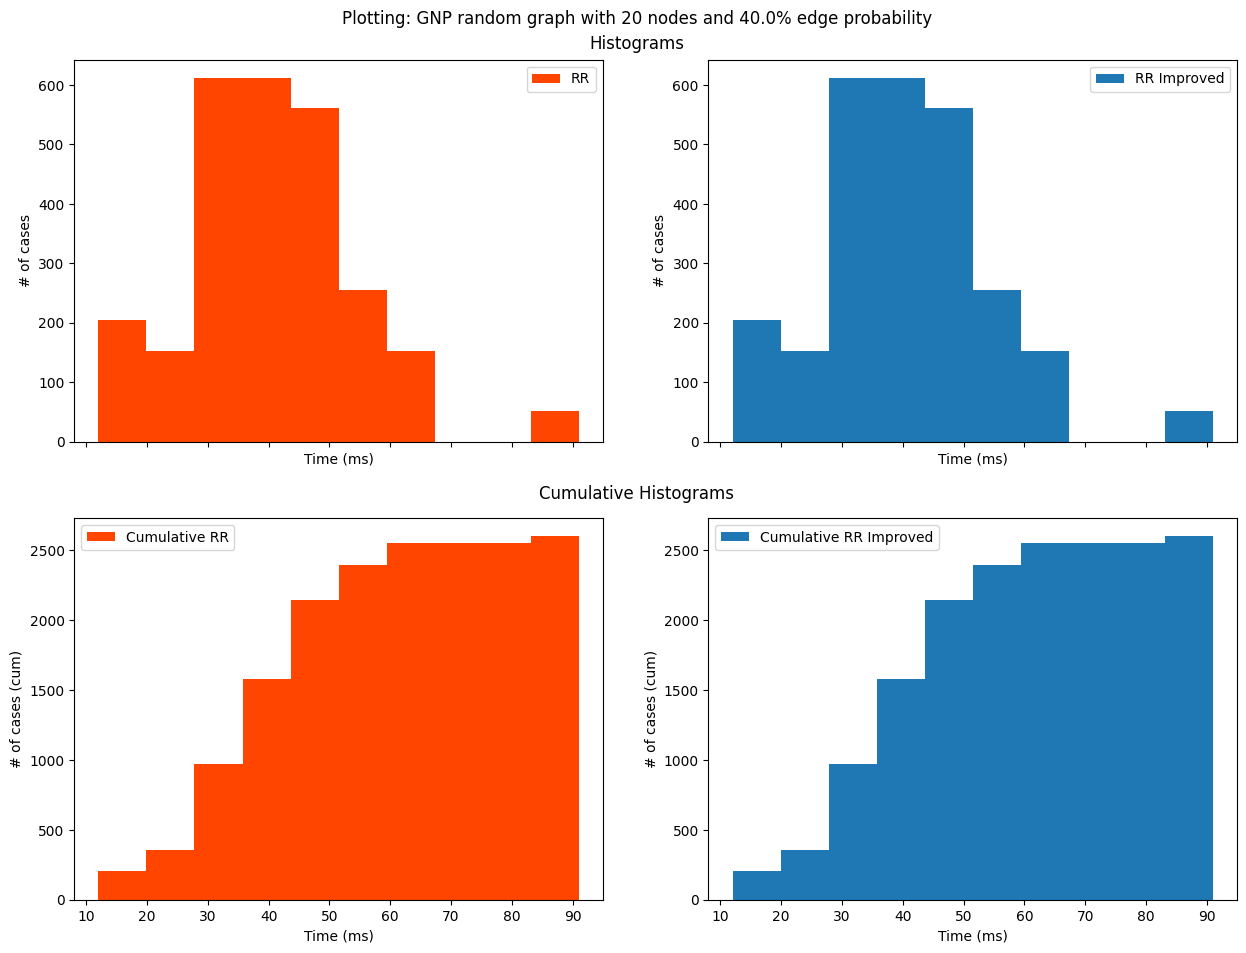

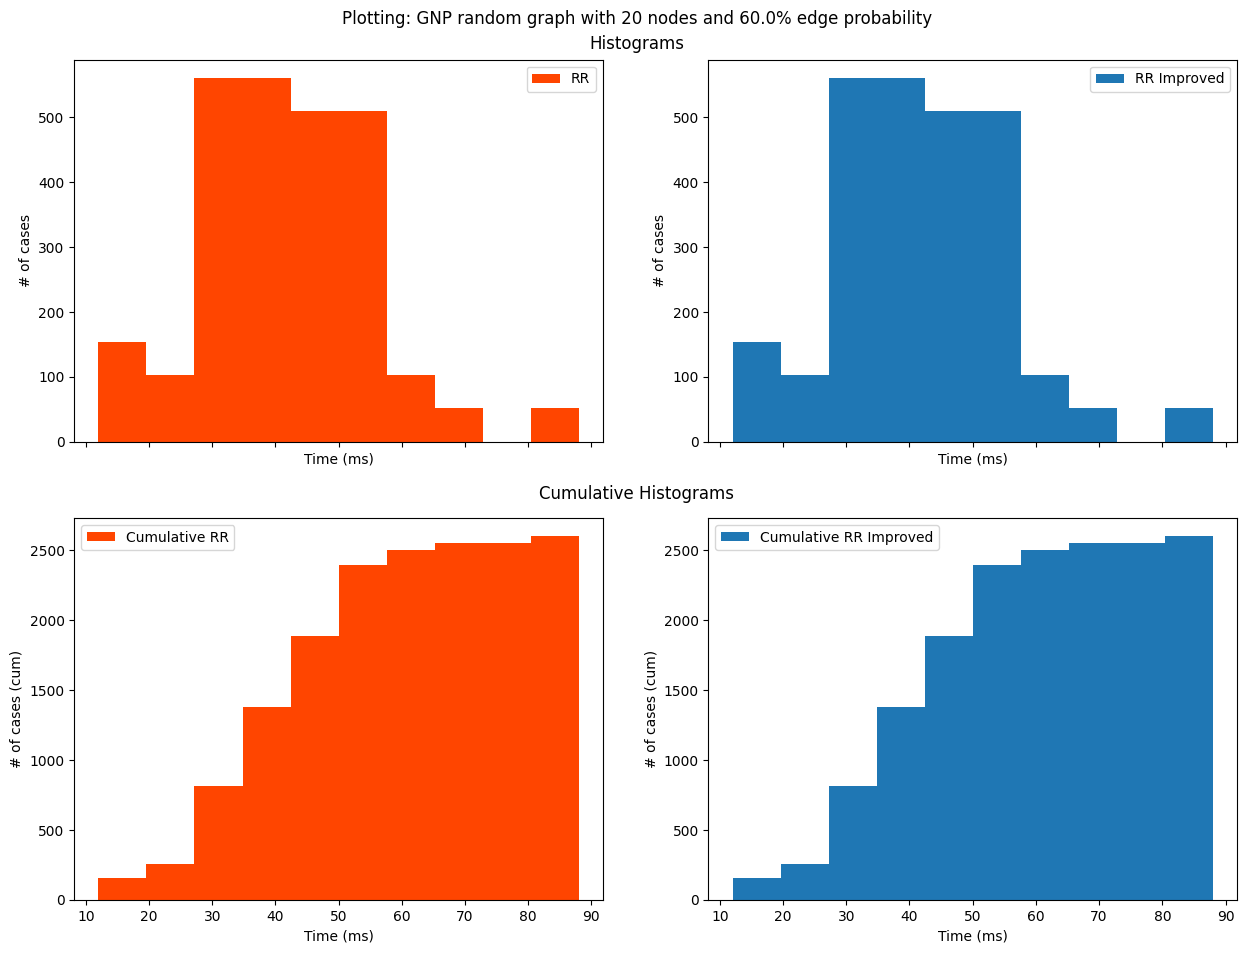

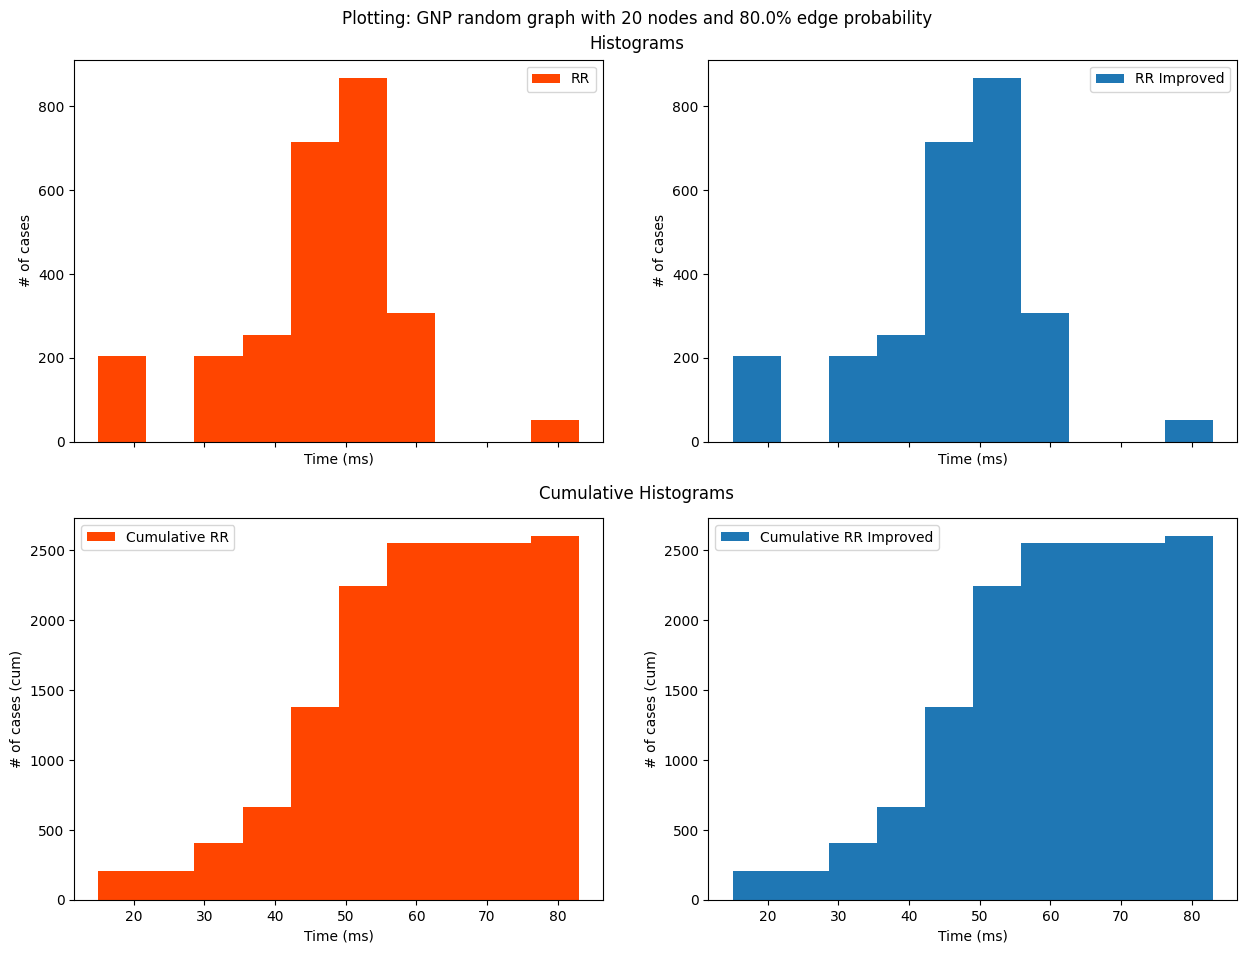

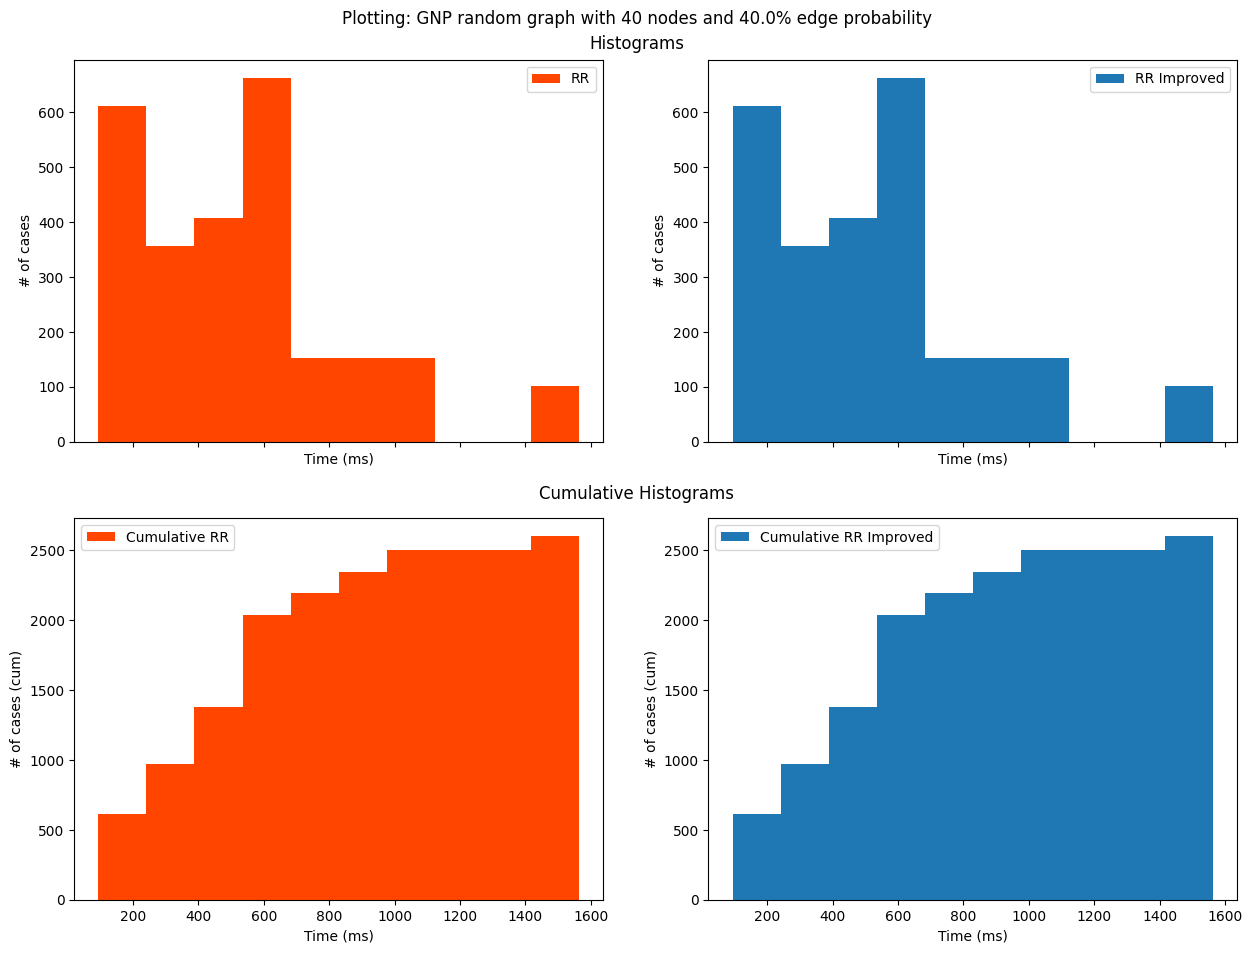

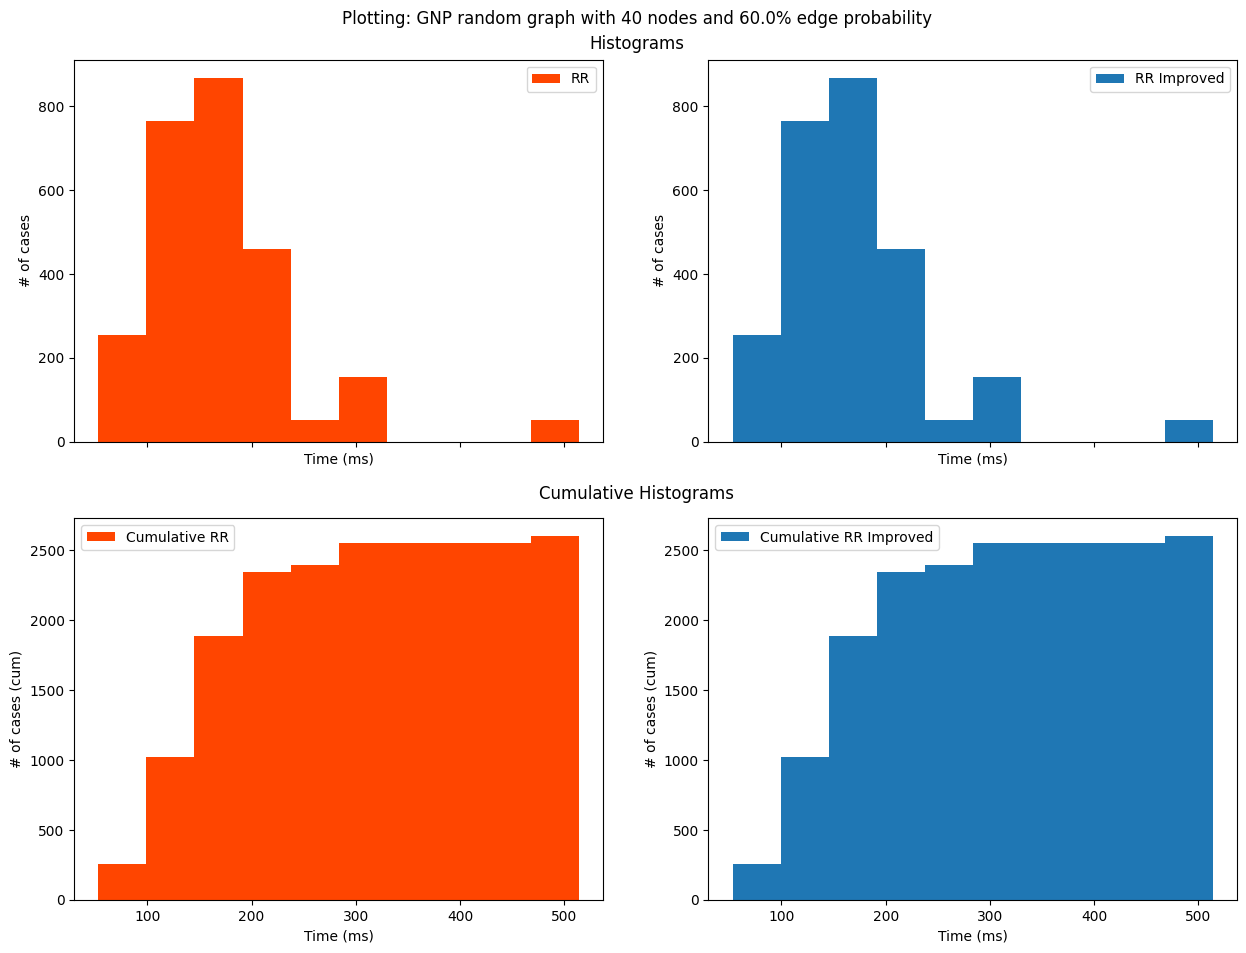

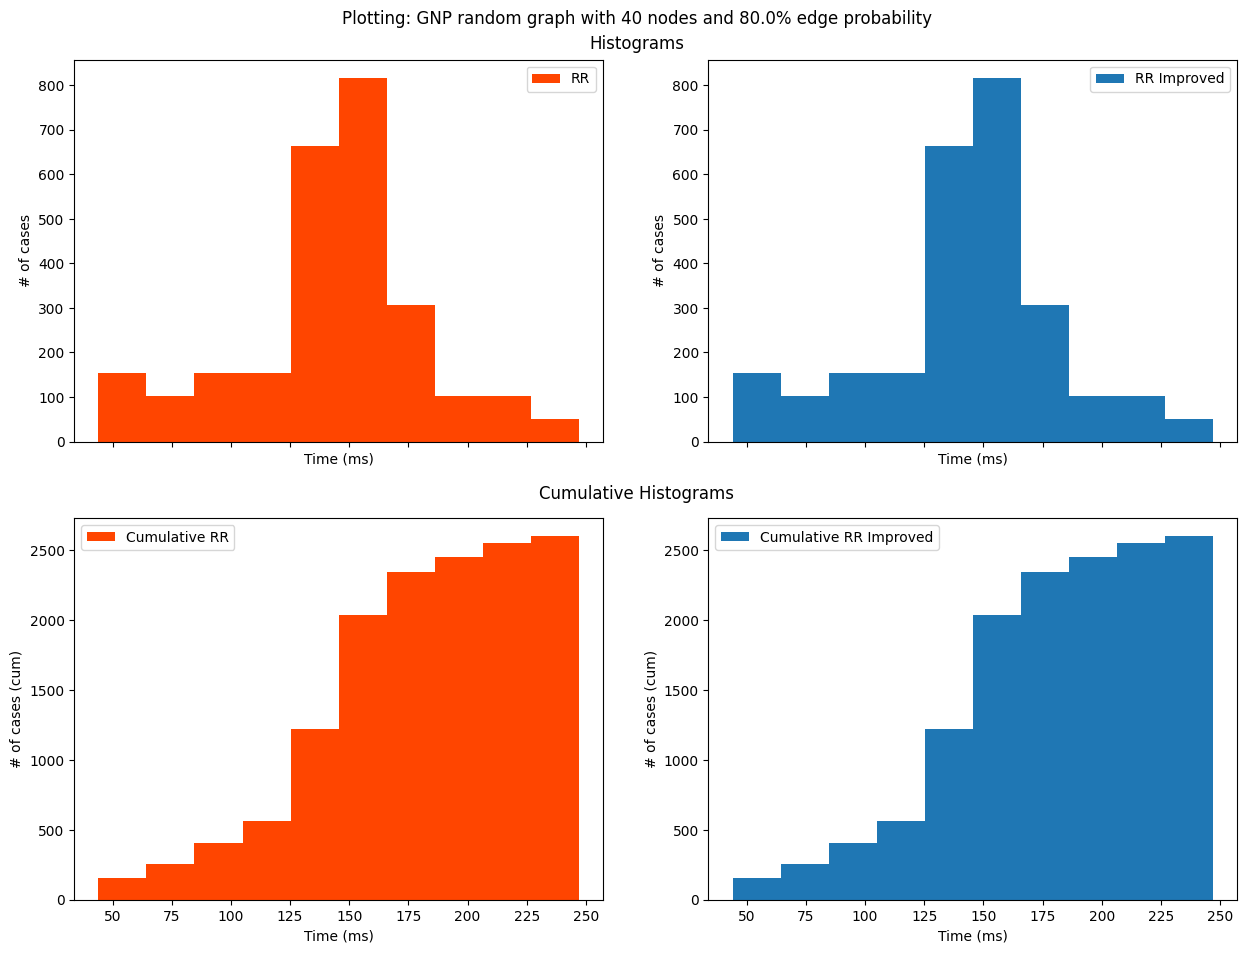

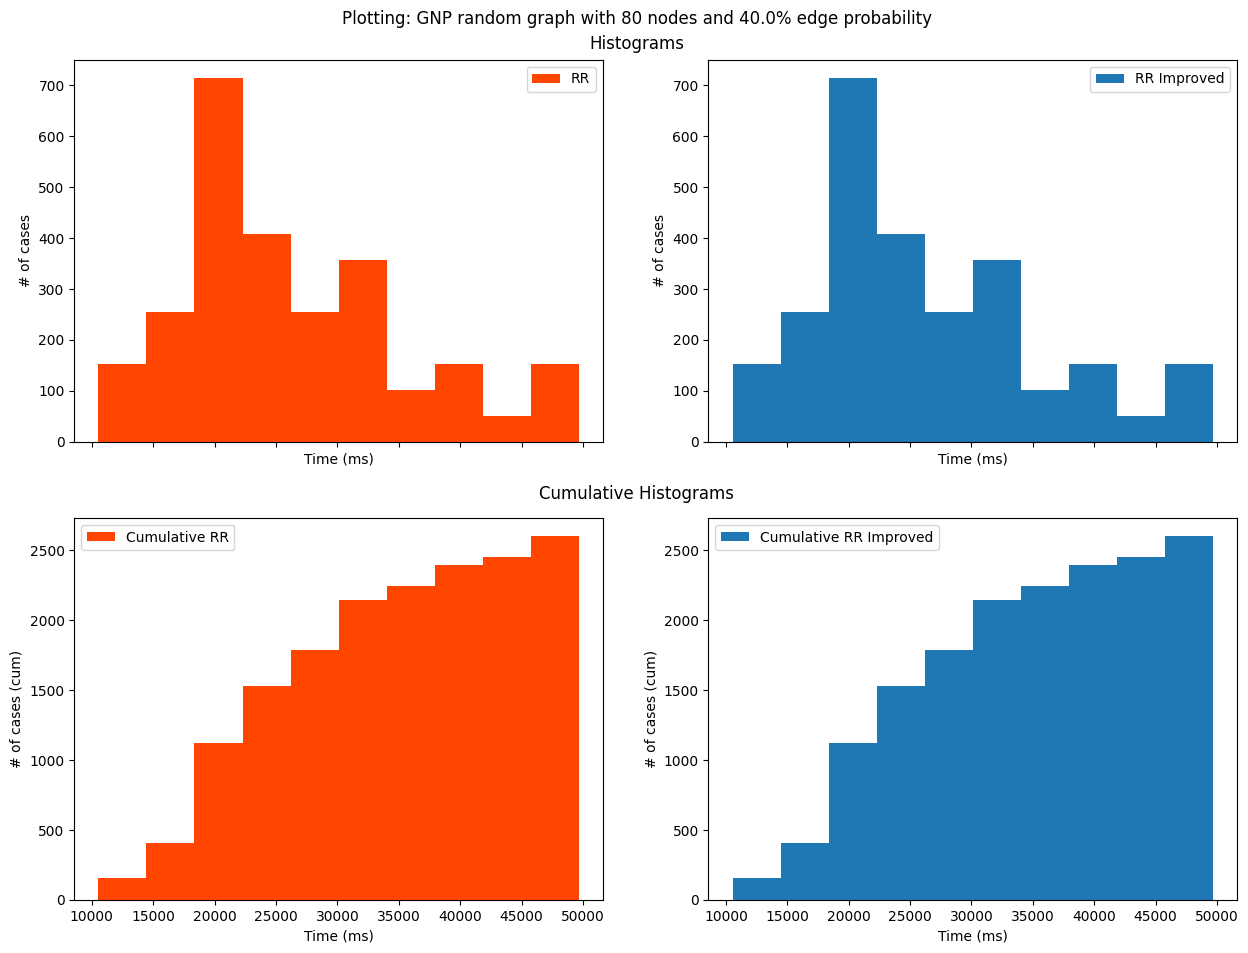

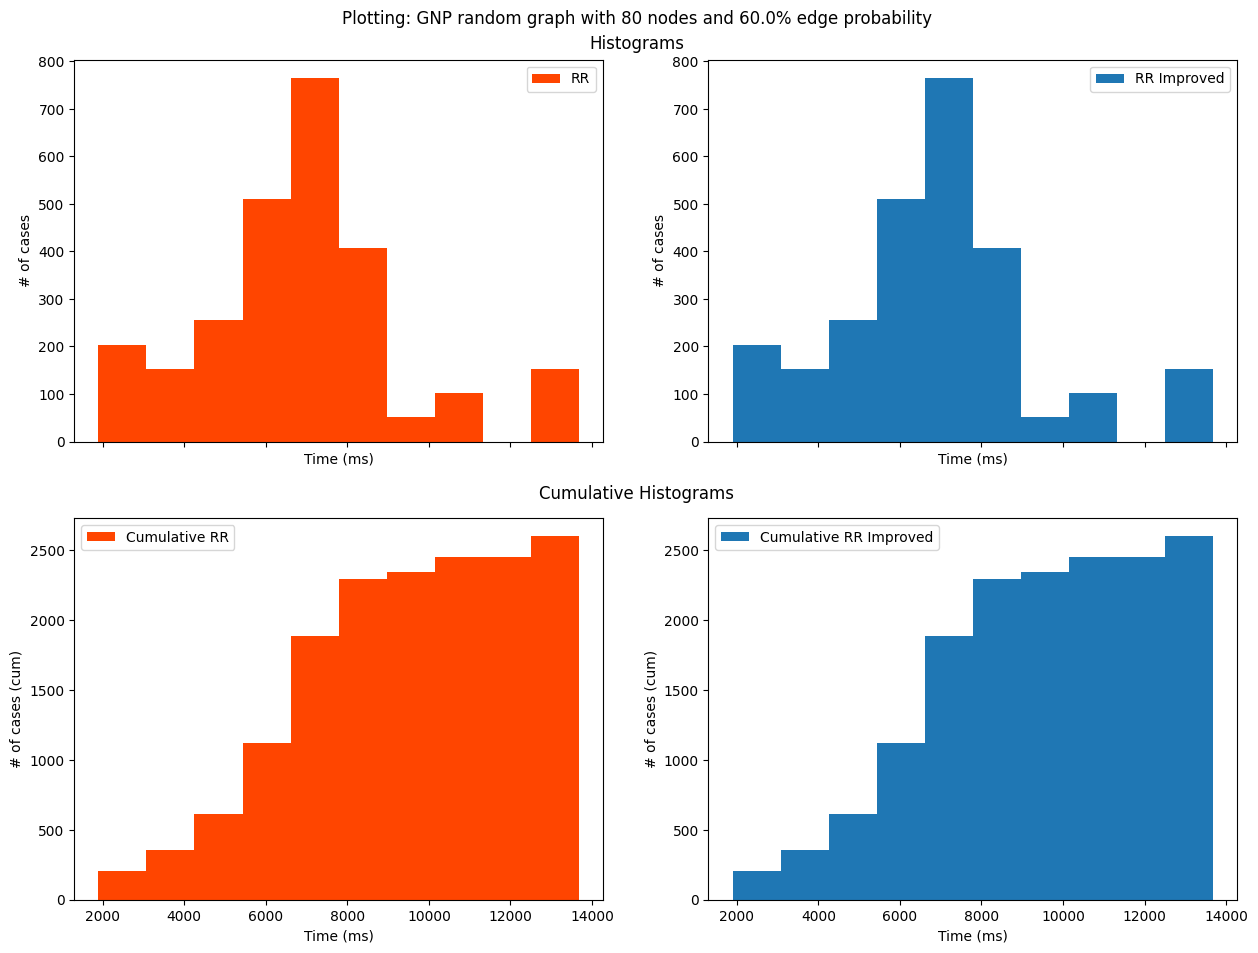

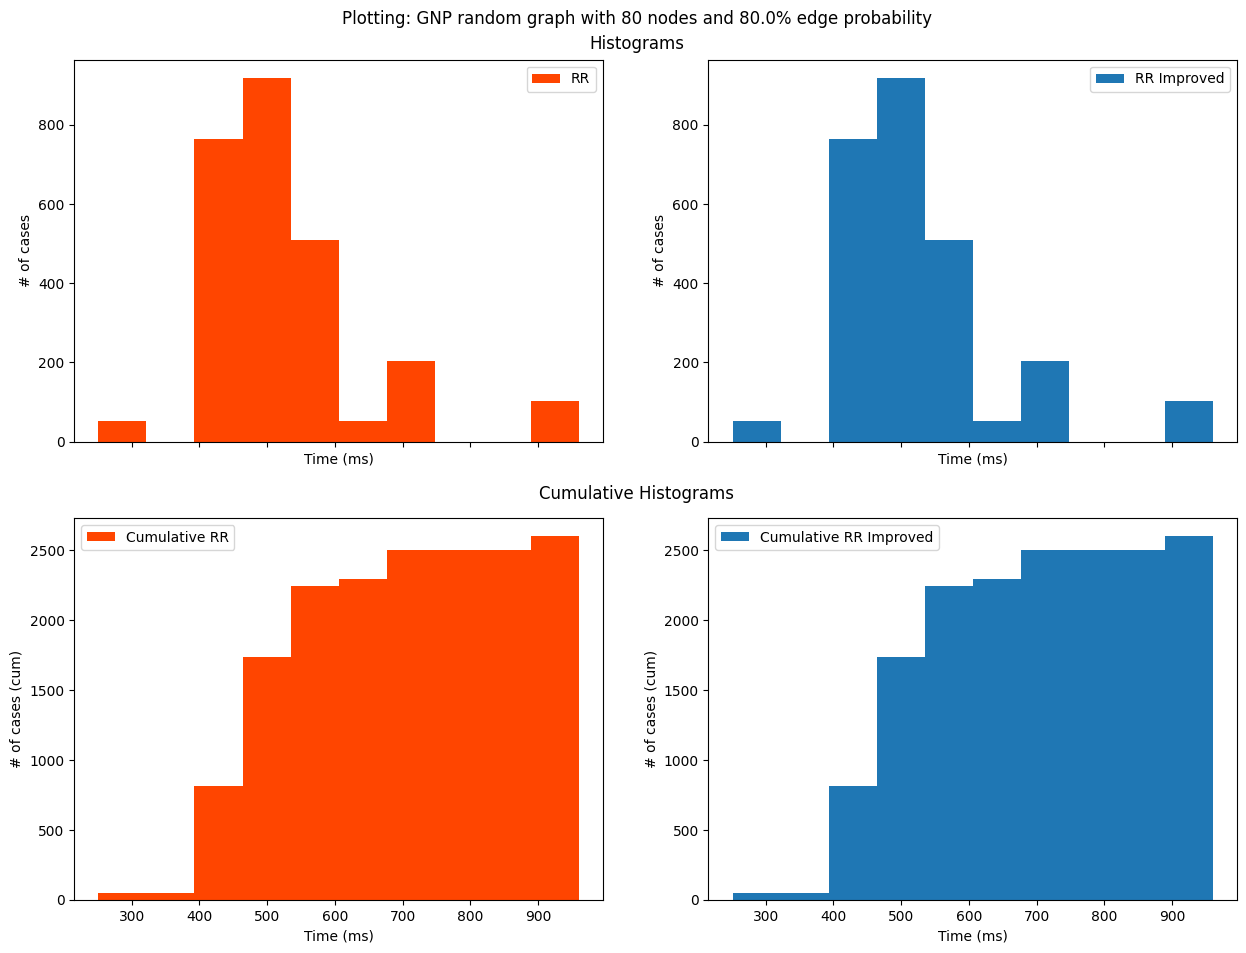

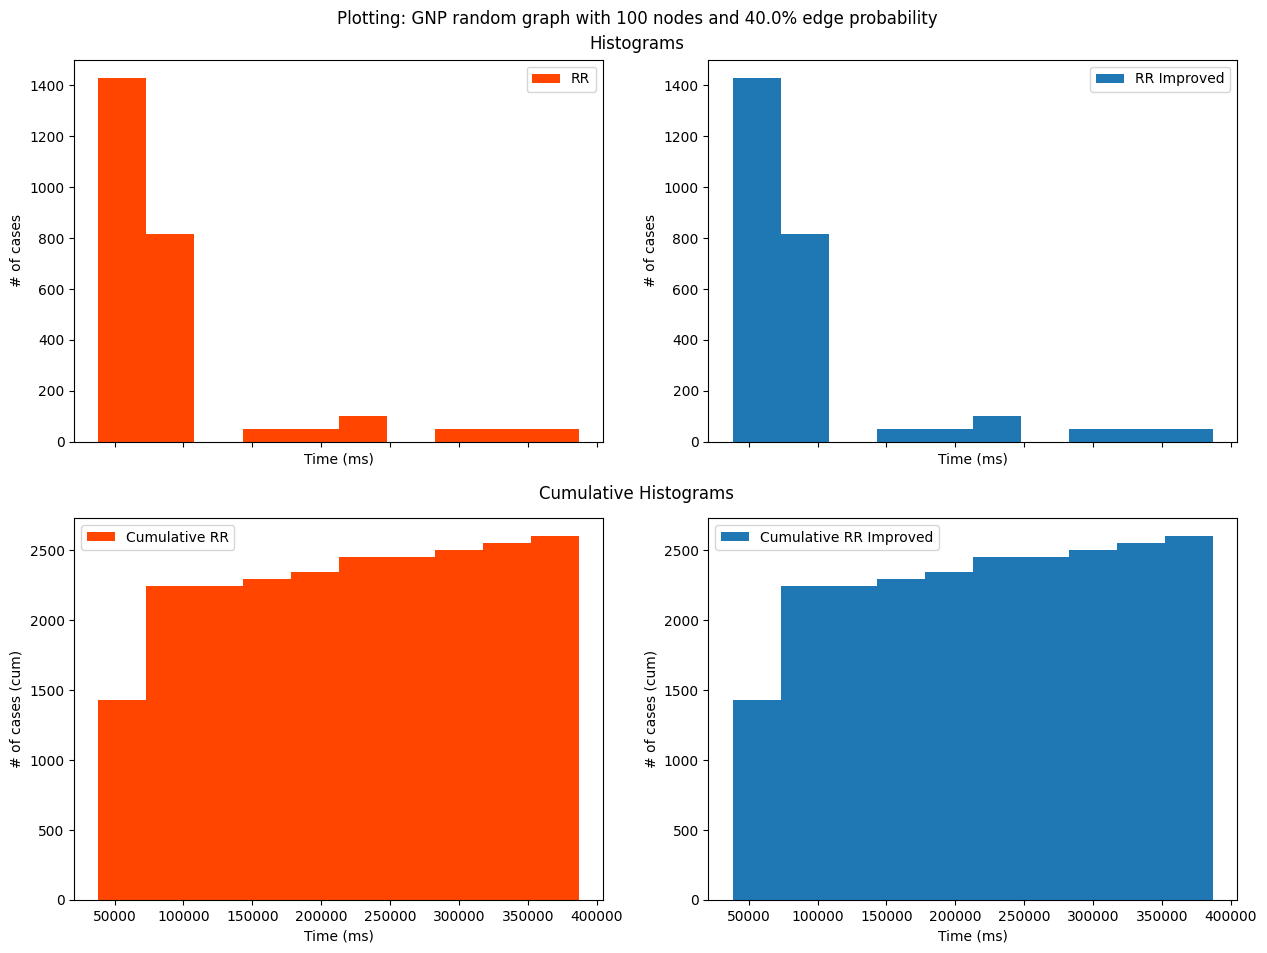

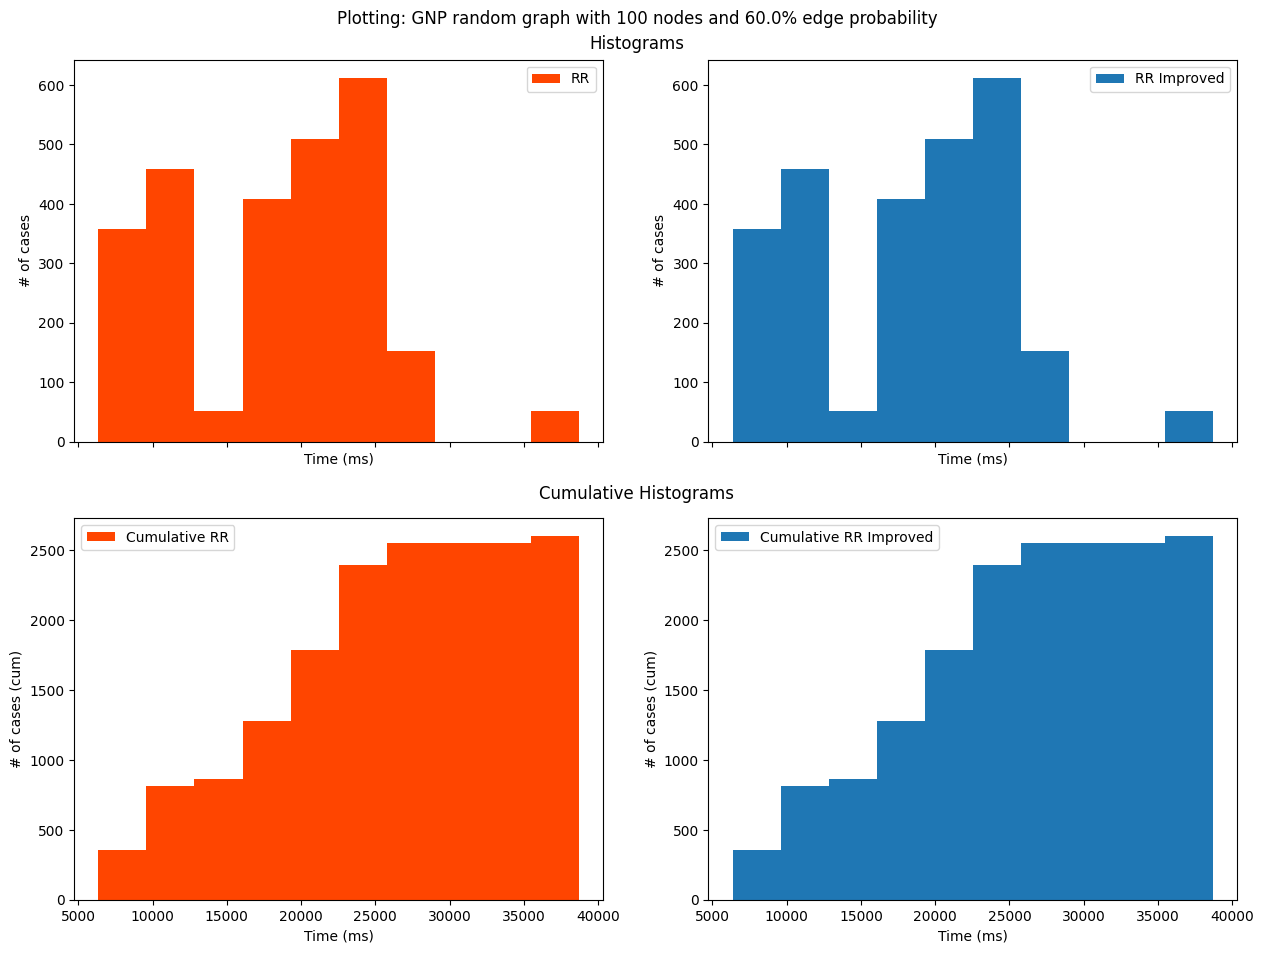

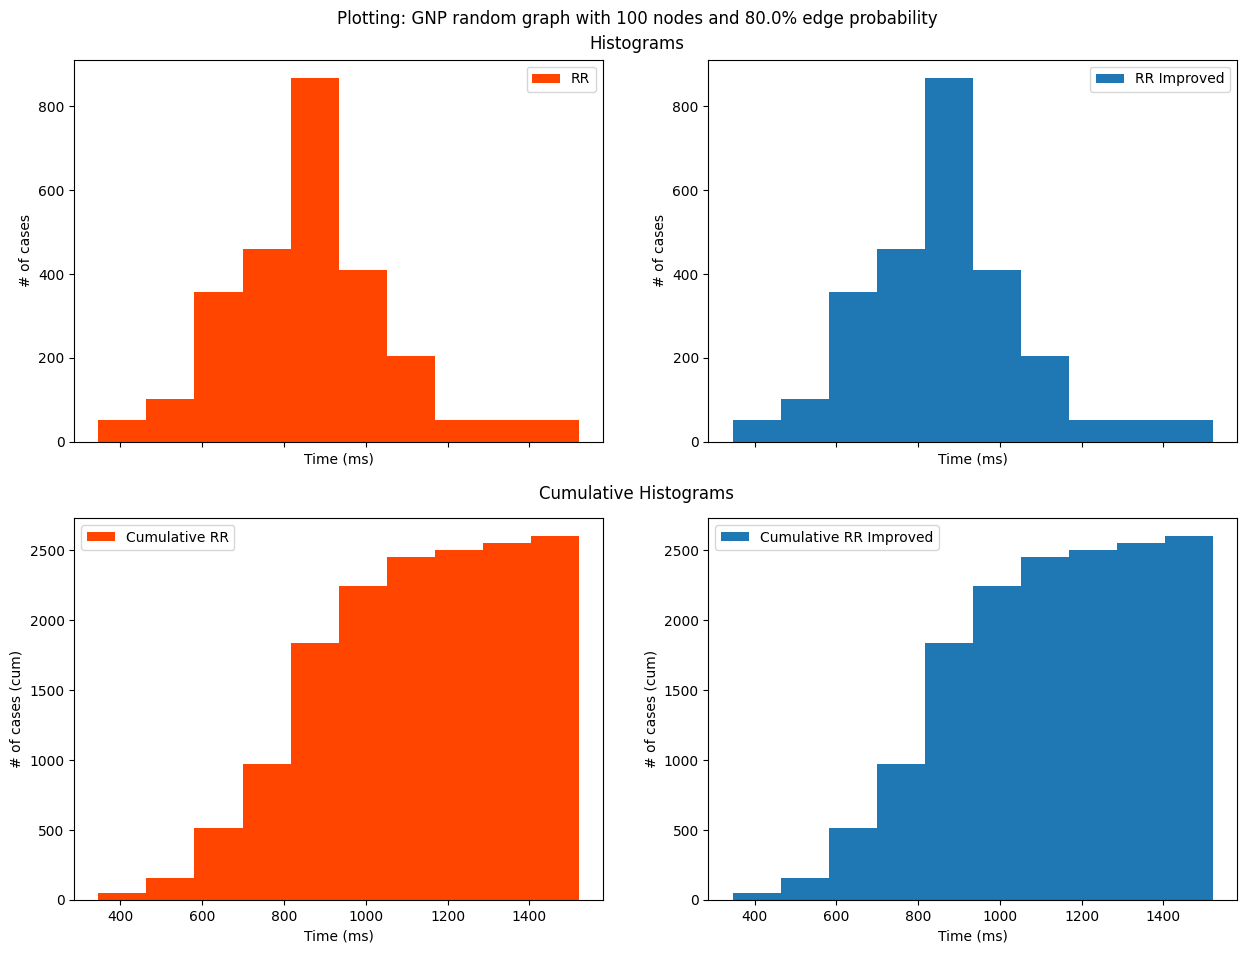

In [34]:
for plot_name in plot_names:

    # Plotar histograma para rr_imp_df
    fig, (hist, cum_hist) = plt.subplots(2, 2, sharex=True, figsize=(15,10))
    (rr, imp) = hist
    (rr_cum, imp_cum) = cum_hist #sharey=True, sharex=True)

    fig.suptitle(f'Plotting: {plot_name}', y = 1)
    fig.subplots_adjust(top=0.95)
    #fig.tight_layout()

    subfigs = fig.subfigures(nrows=2, ncols=1)

    
    names_df = rr_and_imp_df['plot_name'] == plot_name
    plot_df = rr_and_imp_df.loc[rr_and_imp_df['plot_name'] == plot_name]
    
    subfigs[0].suptitle('Histograms', y = 0.95)
    rr.sharey(imp)
    
    rr.hist(plot_df['time_ms_rr'], label='RR', color='orangered')
    rr.set_xlabel('Time (ms)')
    rr.set_ylabel('# of cases')
    rr.legend()
    
    imp.hist(plot_df['time_ms_imp'], label='RR Improved')
    imp.set_xlabel('Time (ms)')
    imp.set_ylabel('# of cases')
    imp.legend()


    subfigs[1].suptitle('Cumulative Histograms', y = 1.05)
    rr_cum.sharey(imp_cum)

    rr_cum.hist(plot_df['time_ms_rr'], label='Cumulative RR', color='orangered', cumulative=True)
    rr_cum.set_xlabel('Time (ms)')
    rr_cum.set_ylabel('# of cases (cum)')
    rr_cum.legend()
    
    imp_cum.hist(plot_df['time_ms_imp'], label='Cumulative RR Improved', cumulative=True)
    imp_cum.set_xlabel('Time (ms)')
    imp_cum.set_ylabel('# of cases (cum)')
    imp_cum.legend()

In [119]:
for t, it in zipped_types:

    # Plotar histograma para rr_imp_df
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(15,5))
    
    f.suptitle(f'Histogram of - {t}')
    f.tight_layout()

    df_rr_filtered = rr_df[rr_df['plot_name'] == it]
    ax1.hist(df_rr_filtered['time_ms'], label='RR', bins = 25, color='orangered', cumulative=True, histtype='stepfilled')
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('# of cases (cum)')
    ax1.legend()
    
    df_rr_imp_filtered = rr_imp_df[rr_imp_df['plot_name'] == t]
    ax2.hist(df_rr_imp_filtered['time_ms'], label='RR Improved', bins = 25, cumulative=True, histtype='stepfilled')
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('# of cases (cum)')
    ax2.legend()

KeyError: 'probabilities'